In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
df=pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [9]:
from sklearn.model_selection import train_test_split
# veri setini ayırma işlemi 
#test:%20 , train:%80
train, test = train_test_split(df, test_size=0.2)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

#burada degree'i belirliyoruz ve obje oluşturuyoruz
poly = PolynomialFeatures(degree=2)

In [13]:
train_x_poly = poly.fit_transform(train_x) #poly olarak 2. dereceye dataya dönüştürüyoruz

print(train_x_poly)

[[ 1.    1.4   1.96]
 [ 1.    3.6  12.96]
 [ 1.    3.    9.  ]
 ...
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    3.    9.  ]]


In [14]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [15]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.75643426 -1.6138187 ]]
Intercept: [107.57105133]


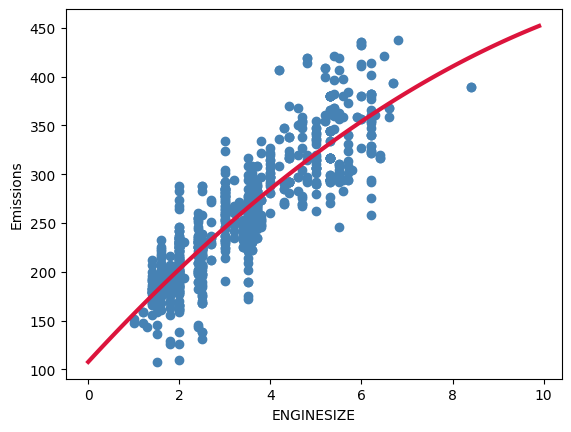

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
#ne kadar nokta verirsek o kadar y değerinin karşılığını alırız
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [19]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[107.57105133 112.63055657 117.65778544 122.65273793 127.61541404
 132.54581378 137.44393715 142.30978415 147.14335477 151.94464901
 156.71366689 161.45040838 166.15487351 170.82706226 175.46697464
 180.07461064 184.64997027 189.19305352 193.7038604  198.18239091
 202.62864504 207.0426228  211.42432418 215.77374919 220.09089783
 224.37577009 228.62836598 232.84868549 237.03672863 241.1924954
 245.31598579 249.4071998  253.46613745 257.49279872 261.48718361
 265.44929214 269.37912428 273.27668006 277.14195946 280.97496248
 284.77568913 288.54413941 292.28031331 295.98421084 299.655832
 3

### evaluation
- mean absolutee error (MAE)
- mean squared error (MSE)
- R2-score

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted_y = clf.predict(train_x_poly)

mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MSE: ", mse)

r2=r2_score(train_y, predicted_y)
print("r2-score: ", r2)

MAE:  23.41745088824029
MSE:  945.7071900247367
r2-score:  0.7623270058922198


### Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?